In [0]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.


In [0]:
np.random.seed(1671) #for reproducibility

In [0]:
#network and training
NB_EPOCH=200
BATCH_SIZE=128
VERBOSE=1
NB_CLASSES=10 #number of outputs=number of digits
OPTIMIZER=SGD() 
N_HIDDEN=128
VALIDATION_SPLIT=0.2 #how much TRAIN is reserved for validation


In [0]:
#data is shuffled and split between train and test sets
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [0]:
print("Shape of X_train"+str(X_train.shape))
print("Shape of y_train"+str(y_train.shape))
print("Shape of X_test"+str(X_test.shape))
print("Shape of y_test"+str(y_test.shape))

Shape of X_train(60000, 28, 28)
Shape of y_train(60000,)
Shape of X_test(10000, 28, 28)
Shape of y_test(10000,)


In [0]:
#X_train is 60000 rows of 28*28 values--> rshaped in 60000*784
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [0]:
#normalize fixel with in 0/1 so divide by 255 and 10 classes each digit for one digit
X_train/=255
X_test/=255
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


In [0]:
#convert class vectors to binary class matrics
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)

In [0]:
#10 outputs
#final stage is softmax
RESHAPED=784
N_HIDDEN=128
DROPOUT=0.3



In [0]:
model=Sequential()
model.add(Dense(N_HIDDEN,input_shape=(RESHAPED,)))
model.add(Activation('relu'))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 51us/step - loss: 1.4366 - acc: 0.6428 - val_loss: 0.7225 - val_acc: 0.8389
Epoch 2/200
48000/48000 [==============================] - 2s 46us/step - loss: 0.5818 - acc: 0.8547 - val_loss: 0.4409 - val_acc: 0.8839
Epoch 3/200
48000/48000 [==============================] - 2s 46us/step - loss: 0.4278 - acc: 0.8840 - val_loss: 0.3646 - val_acc: 0.8977
Epoch 4/200
48000/48000 [==============================] - 2s 45us/step - loss: 0.3699 - acc: 0.8970 - val_loss: 0.3286 - val_acc: 0.9074
Epoch 5/200
48000/48000 [==============================] - 2s 47us/step - loss: 0.3371 - acc: 0.9044 - val_loss: 0.3039 - val_acc: 0.9127
Epoch 6/200
48000/48000 [==============================] - 2s 49us/step - loss: 0.3144 - acc: 0.9105 - val_loss: 0.2869 - val_acc: 0.9172
Epoch 7/200
48000/48000 [==============================] - 2s 50us/step - loss: 0.2970 - acc: 0.9152 - val_loss: 0.2729 - 

In [0]:
score=model.evaluate(X_test,y_test,verbose=1)
print("\nTest score:",score[0])
print("\nTest accuracy:",score[1])

10000/10000 [==============================] - 0s 35us/step

Test score: 0.08237258082695771

Test accuracy: 0.9763


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


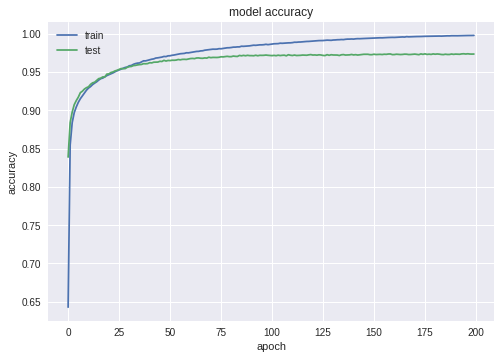

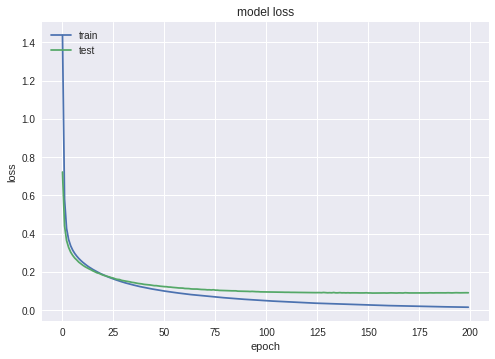

In [0]:
import matplotlib.pyplot as plt
#list all data in history
print(history.history.keys())
#summarizez history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('apoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()